<a href="https://colab.research.google.com/github/eischenskevin/AdvLinearAlgebra/blob/master/Copy_of_Copy_of_Transformations_for_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In this worksheet, we will generate matrix functions and use them to verify our solution to the car driving problem.
The car will be represented by a vector $$\vec{c} = \left( \begin{array}{c} x \\  y \\  1 \\ \end{array} \right)$$
and the headlights will be represented by a vector
$$ \vec{l} = \left( \begin{array}{c} x \\ y \\ 1 \\ \end{array} \right)$$
which will extend one unit in front of the car.

We will use the car and light definition to practice function declarations.  To place the car at (3,0) on the x-axis, we could specify:

In [0]:
#car = np.array([3,0,1]) 
#car = np.mat('3,0,1')
#car = np.mat('3,0,1').T
car = np.matrix([[3],[0],[1]])

car

matrix([[3],
        [0],
        [1]])

Instead, we will make it easy to specify where the car is by letting us define the car as a function of two inputs, the $x$ and $y$ location, like so:  $$location(x,y) = \left( \begin{array}{c} x \\ y \\ 1 \\  \end{array} \right)$$

so that we can specify

$$ car = location(3,0)   \hspace{2cm} lights = location(3,1)$$

by modifying the code block below:

```
def square(a):
       """Return the square of a."""
       return a ** 2
```


In [0]:
def location(a,b):
       """create a vector at location [ a, b, 1]."""
       return np.matrix([[a],[b],[1]])

location(5,11)




matrix([[ 5],
        [11],
        [ 1]])

In [0]:
#Verify that it works to define the car and the light direction:

car = location(3,0)

light = location(3,1)

car

matrix([[3],
        [0],
        [1]])

In your homework, you constructed several matrices by combining translation matrices and rotation matrices

$$
T_{c,d} = \left( \begin{array}{ccc} 1 & 0 & c \\ 0 & 1 & d \\ 0 & 0 & 1 \\ \end{array} \right) \hspace{2cm} R_\phi = \left( \begin{array}{ccc} \cos \phi & -\sin \phi & 0 \\ \sin \phi & \cos \phi & 0 \\ 0 & 0 & 1 \\ \end{array} \right)
$$

into complicated matrices which could rotate a car at a fixed position.  We're going to verify your results by combining matrices and checking the effect on the car's direction.

First, let's define the two basic matrices $T(a,b)$ and $R(\phi)$:

In [0]:
def T(c,d):
  """Return a 3x3 matrix which translates x by a and y by b"""
  return np.matrix([[1,0,c], [0,1,d], [0,0,1]])

def R(phi):
  """Return a 3x3 matrix which translates around the origin by angle phi"""
  return np.matrix([[np.cos(np.deg2rad(phi)), -1*np.sin(np.deg2rad(phi)), 0], [np.sin(np.deg2rad(phi)), np.cos(np.deg2rad(phi)), 0], [0, 0, 1] ])


Be Careful!!!  Just because something looks like a matrix does not mean it is a matrix!!!   In your group, develop some tests to make sure we have the results we expect.  Each group contributes one idea:

In [0]:
#R(90)
T(3,4)*T(3,4)

matrix([[1, 0, 6],
        [0, 1, 8],
        [0, 0, 1]])

Here's some documentation on the difference between arrays and matrices:

https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.classes.html#index-0

We'll test the result  of the translations on our original car and light position, which moved the car from $(3,0)$ to $(3,0)$ but from pointing 'north' to pointing 'east'  (e.g. pointing toward $(4,0)$ to $(3,1)$  )




In [0]:
car = location(3,0)
light = location(3,1)

newcar = T(3,3) * R(270) * car
newlight = T(3,3) * R(270) * light

newlight

matrix([[4.],
        [0.],
        [1.]])

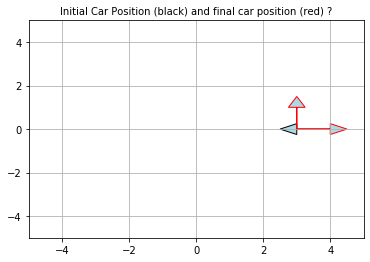

In [0]:
ax = plt.axes()

ax.arrow(car[0,0], car[1,0], newcar[0,0] - car[0,0], newcar[1,0] - car[1,0], head_width=0.5, head_length=0.5, fc='lightblue', ec='black')
ax.arrow(car[0,0], car[1,0], light[0,0] - car[0,0], light[1,0] - car[1,0], head_width=0.5, head_length=0.5, fc='lightblue', ec='red')

#new direction of lights;
ax.arrow(car[0,0], car[1,0], newlight[0,0] - car[0,0], newlight[1,0] - car[1,0], head_width=0.5, head_length=0.5, fc='lightblue', ec='red')

plt.grid()

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title('Initial Car Position (black) and final car position (red) ?',fontsize=10)

plt.savefig('Initial Car Position (black) and final car position (red).png', bbox_inches='tight')
plt.show()
plt.close()

# Homework 1:  Construct the transformation that allows the car to turn right by 90 degrees from location (a,b)
Construct the single matrix $R_{a, b, 90}$ as a product of the simple matrices $T_{c,d}$ and $R_{\phi}$ constructed above.

Verify the result by applying your new matrix to the car located at various locations.

Produce a plot that shows the result of the transformation on a car located in at least two different quadrants.


In [0]:
def RabBy90(a,b, T, R):
  """Return a 3x3 matrix which rotates the car at location a,b by 90 degrees."""
  # We have to pass in the T and R functions if we are going to use them in this function.
  return T(a,b) * R(-90) * T(-a, -b)

RabBy90(3,2, T, R)

matrix([[ 6.123234e-17,  1.000000e+00,  1.000000e+00],
        [-1.000000e+00,  6.123234e-17,  5.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

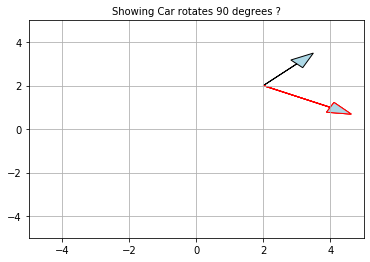

In [0]:
#car 1 location at (3,2) heading toward (3,3)
#car 2 location at (-2, -3) heading toward (-1, -3)

ax = plt.axes()

#car 1 old position:
ax.arrow(2, 2, 1.0, 1.0, head_width=0.5, head_length=0.7, fc='lightblue', ec='black')
#car 1 new position:
ax.arrow(2, 2, 2.0, -1, head_width=0.5, head_length=0.7, fc='lightblue', ec='red')

#car 2 old position:
ax.arrow(2, 2, 2.0, -1, head_width=0.5, head_length=0.7, fc='lightblue', ec='red')
#car 2 new position:
ax.arrow(2, 2, 2.0, -1, head_width=0.5, head_length=0.7, fc='lightblue', ec='red')


plt.grid()

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title('Showing Car rotates 90 degrees ?',fontsize=10)

plt.savefig('Showing Car rotates 90 degrees.png', bbox_inches='tight')
plt.show()
plt.close()

# Homework 2:  Construct the transformation that allows the car to turn right by phi degrees from location (a,b)

Construct the single matrix  $R_{a,b,phi}$  as a product of the simple matrices  $T_{c,d}$  and  $R_\phi$  constructed above.

Verify the result by applying your new matrix to the car located at various locations.

Produce a plot that shows the result of the transformation on a car located in at least two different quadrants.

In [0]:
def RabByPhi(a,b,phi, T, R):
  """Return a 3x3 matrix which rotates the car at location a,b by 90 degrees."""
  return T(a,b) * R(phi) * T(-a, -b)

RabByPhi(3, 0, -90, T, R)

matrix([[ 6.123234e-17,  1.000000e+00,  3.000000e+00],
        [-1.000000e+00,  6.123234e-17,  3.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

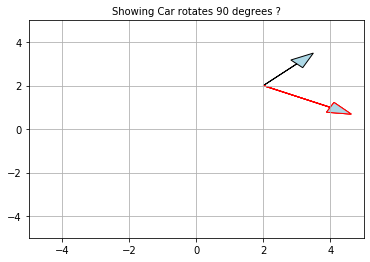

In [0]:
#car 1 location at (3,2) heading toward (3,3)
#car 2 location at (-2, -3) heading toward (-1, -3)
#  Have one car rotate by 180? degrees, and the other rotate by some other amount of degrees.

ax = plt.axes()

#car 1 old position:
ax.arrow(2, 2, 1.0, 1.0, head_width=0.5, head_length=0.7, fc='lightblue', ec='black')
#car 1 new position:
ax.arrow(2, 2, 2.0, -1, head_width=0.5, head_length=0.7, fc='lightblue', ec='red')

#car 2 old position:
ax.arrow(2, 2, 2.0, -1, head_width=0.5, head_length=0.7, fc='lightblue', ec='red')
#car 2 new position:
ax.arrow(2, 2, 2.0, -1, head_width=0.5, head_length=0.7, fc='lightblue', ec='red')


plt.grid()

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title('Showing Car rotates 90 degrees ?',fontsize=10)

plt.savefig('Showing Car rotates 90 degrees.png', bbox_inches='tight')
plt.show()
plt.close()

# Putting the car in the garage.

With the car starting at $(3,0)$ and pointing toward $(3,1)$, we want to make the car go to $(-2,-2)$ pointing toward $(-2,-3)$.

Draw the car's route out on the whiteboard, making sure to note it's location at each corner.

Then, iteratively apply the matrices constructed above to verify your sequence of matrices puts the car into the garage appropriately.

You may want to generate a plot of the car's position and path using the plotting code given above.



In [0]:
#car 1 location at (3,0) heading toward (3,1)
#car 1 final location at (-2, -2) heading toward (-2, -3)

car = location(3,0)
light = location(3,1)

#apply matrices in order to get the car to the correct locations

T(0,1) * RabByPhi(-2,-3,90, T, R) * T(-5,0) * RabByPhi(3,-3,270, T, R) * T(0,-3) * RabByPhi(3,0,180, T, R) * car

# also apply to the above matrix sequence to the light

T(0,1) * RabByPhi(-2,-3,90, T, R) * T(-5,0) * RabByPhi(3,-3,270, T, R) * T(0,-3) * RabByPhi(3,0,180, T, R) * light



matrix([[-2.],
        [-3.],
        [ 1.]])

Once you have verified you've completed this task, create the single matrix from all of your transformations:


In [0]:
#create the full matrix as either a function or as a multiplication of matrices

#fullmatrix

def fullMatrix(a,b, T, R):
  """Describe this matrix"""
  # We have to pass in the T and R functions if we are going to use them in this function.
  return T(0,1) * RabByPhi(-2,-3,90, T, R) * T(-5,0) * RabByPhi(3,-3,270, T, R) * T(0,-3) * RabByPhi(3,0,180, T, R)

fullMatrix(3,0, T, R)


matrix([[-1.0000000e+00, -3.6739404e-16,  1.0000000e+00],
        [ 3.6739404e-16, -1.0000000e+00, -2.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])